**Q1) Median Income of Male and Female Employes**

In [15]:
import pandas as pd1
import numpy as np1

from statistics import mean 
from google.colab import files

uploaded = files.upload()

import io
bring = pd1.read_csv(io.BytesIO(uploaded['multipleChoiceResponses.csv']))

Saving multipleChoiceResponses.csv to multipleChoiceResponses (2).csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
w=pd1.notnull(bring["Q9"]) #Trying To Remove any values which are null
c=bring[w]



In [4]:
# DATA CLEANING (REMOVING THE NULL VALUES)
cleaning = c[(c.Q1 != 'Prefer not to say') & (c.Q1 != 'Prefer to self-describe') 
& (c.Q9 != 'I do not wish to disclose my approximate yearly compensation')]# Cleaning the obsolete Data
clean_data1=cleaning[['Q1','Q9']][1:]
print(clean_data1)


           Q1           Q9
2        Male    10-20,000
3      Female     0-10,000
5        Male     0-10,000
7        Male    10-20,000
8        Male     0-10,000
...       ...          ...
23844    Male   90-100,000
23845    Male     0-10,000
23854    Male    10-20,000
23855    Male  250-300,000
23857    Male    10-20,000

[15246 rows x 2 columns]


In [5]:
n=clean_data.groupby('Q9') #performing groupby for salary column


In [6]:
# GROUPING DATA BASED ON SALARIES
med1=n.get_group('0-10,000')
med2=n.get_group('10-20,000')
med3=n.get_group('20-30,000')
med4=n.get_group('30-40,000')
med5=n.get_group('40-50,000')
med6=n.get_group('50-60,000')
med7=n.get_group('60-70,000')
med8=n.get_group('70-80,000')
med9=n.get_group('80-90,000')
med10=n.get_group('90-100,000')
med11=n.get_group('100-125,000')
med12=n.get_group('125-150,000')
med13=n.get_group('150-200,000')
med14=n.get_group('200-250,000')
med15=n.get_group('250-300,000')
med16=n.get_group('300-400,000')
med17=n.get_group('400-500,000')
med18=n.get_group('500,000+')




In [7]:
full=pd1.concat([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18], axis=0) ##Sorted data in Ascending Order to calculate Median 
print(full)
full1=full.groupby('Q1')['Q9']

# SEPERATING MALES & FEMALES FROM THE SALARY GROUP
males=full1.get_group('Male') 
females=full1.get_group('Female')

total = full.groupby('Q9')
print(total)

           Q1        Q9
3      Female  0-10,000
5        Male  0-10,000
8        Male  0-10,000
18       Male  0-10,000
24     Female  0-10,000
...       ...       ...
21122    Male  500,000+
22264    Male  500,000+
22591  Female  500,000+
23098    Male  500,000+
23627  Female  500,000+

[15246 rows x 2 columns]


In [8]:
index_reset_male=males.reset_index() # To Treat index as column
index_reset_female=females.reset_index()
final_value_male=index_reset_male['Q9']
male_median=int((len(final_value_male)+1)/2)#Median Formula(Male)   (Index value of Median is stored in male_median)
final_male_median=final_value_male.iloc[male_median]  #to get the value of median from "male_median" column
print(f"Median Income of Male population is:{final_male_median}\n")
final_value_female=index_reset_female['Q9']
female_median=int(len(final_value_female)/2)#Median Formula(Female)
final_female_median=final_value_female.iloc[female_median]
print(f"Median Income of Female population is:{final_female_median}")  

Median Income of Male population is:30-40,000

Median Income of Female population is:20-30,000


**Q2) OVERLAID HISTOGRAM OF SALARIES OF MALES AND FEMALE POPULATION**

Text(0, 0.5, 'POPULATION COUNT')

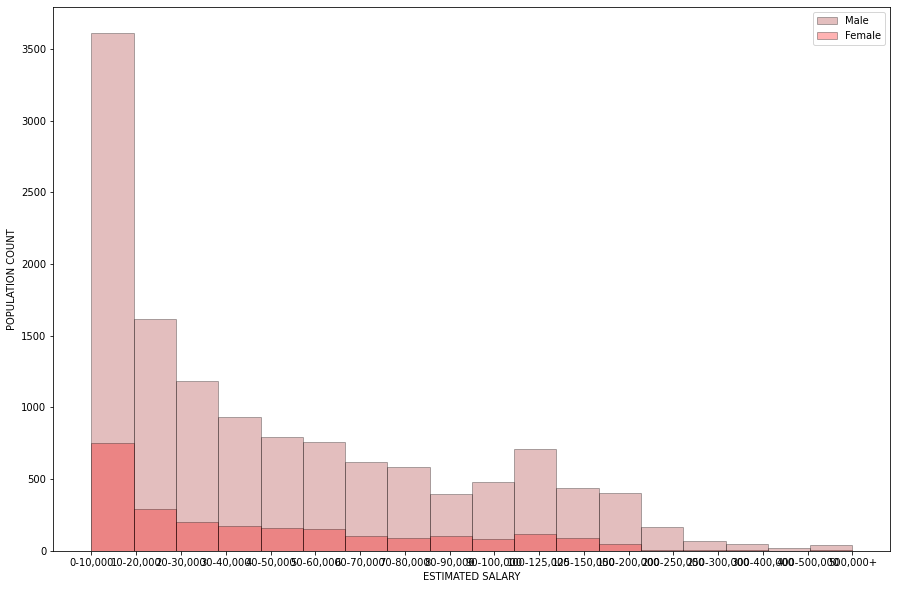

In [16]:
from matplotlib import pyplot

histogram = pyplot.figure(figsize=(15,10))

pyplot.hist(males, bins=18,alpha=0.3, color='brown', label='Male', edgecolor='black') #plotted Male Incomes
pyplot.hist(females, bins=18, alpha=0.3, color='red',edgecolor='black', label='Female') #plotted Female Incomes
pyplot.legend(loc='upper right') # TO DISTINGUISH THE COLORS OF OVERLAID GRAPH
pyplot.xlabel('ESTIMATED SALARY')
pyplot.ylabel('POPULATION COUNT')







**Q3) SAMPLING MALE AND FEMALE SALARIES FROM DATASET**

In [10]:
mi=clean_data[clean_data['Q1']=='Male'].index  # Getting Male indexes from the data
ms=np1.random.choice(mi,250,replace=False) #takes any 250 male values randomly from data
fmale=clean_data.loc[ms] #gets values of the male indexes
fi=clean_data[clean_data['Q1']=='Female'].index   # Getting Female indexes from the data
fs=np1.random.choice(fi,250,replace=False) #takes any 250 female values randomly from data
ffemale=clean_data.loc[fs]  #gets values of the female indexes
print(fmale)
print(ffemale)


         Q1           Q9
2255   Male  125-150,000
8023   Male     0-10,000
6614   Male    10-20,000
6953   Male  100-125,000
13845  Male    10-20,000
...     ...          ...
7061   Male  125-150,000
17792  Male     0-10,000
5320   Male    60-70,000
3899   Male    20-30,000
21945  Male     0-10,000

[250 rows x 2 columns]
           Q1         Q9
19637  Female  10-20,000
2737   Female  80-90,000
12019  Female  40-50,000
22135  Female   0-10,000
7029   Female  70-80,000
...       ...        ...
19032  Female   0-10,000
5995   Female   0-10,000
13213  Female  80-90,000
2366   Female  80-90,000
9144   Female   0-10,000

[250 rows x 2 columns]


**Q4) INCOME HISTOGRAM FOR ABOVE SAMPLING AND MEDIAN INCOME OF MALE AND FEMALE POPULATION**

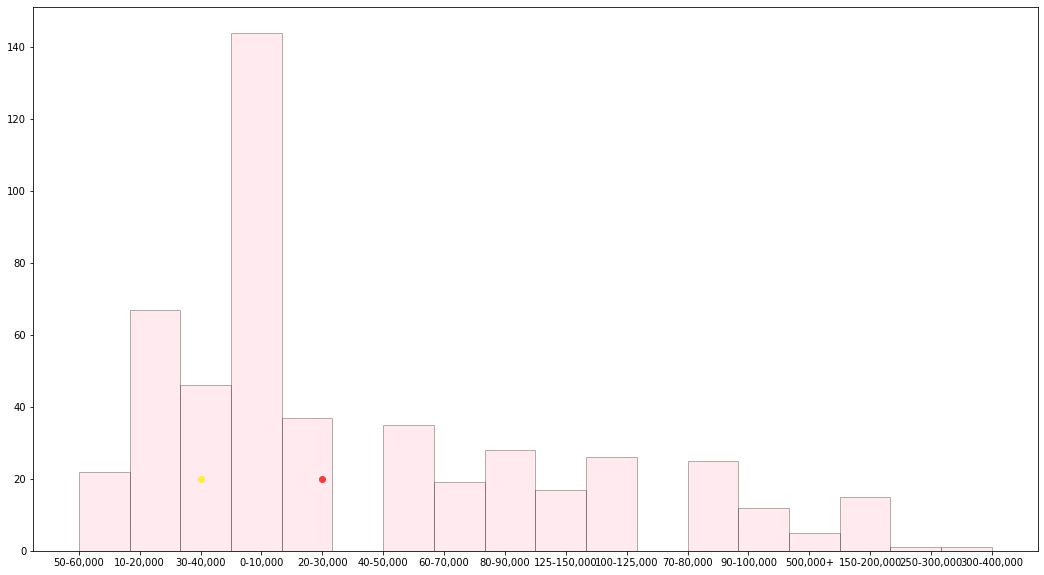

In [26]:
together=pd1.concat([fmale,ffemale],axis=0)
pyplot.figure(figsize=(18,10))
pyplot.hist(together['Q9'], bins=18,alpha=0.3, color='Pink', label='Male', edgecolor='black')
pyplot.scatter(final_male_median, 20, color='yellow')
pyplot.scatter(final_female_median, 20, color='red')


**Q5) HISTOGRAM OF THE MEDIAN OF THE SAMPLE AND RED - DOT TO SHOW MEDIAN OF POPULATION**

The Median Salary differences of Males and females is 5243


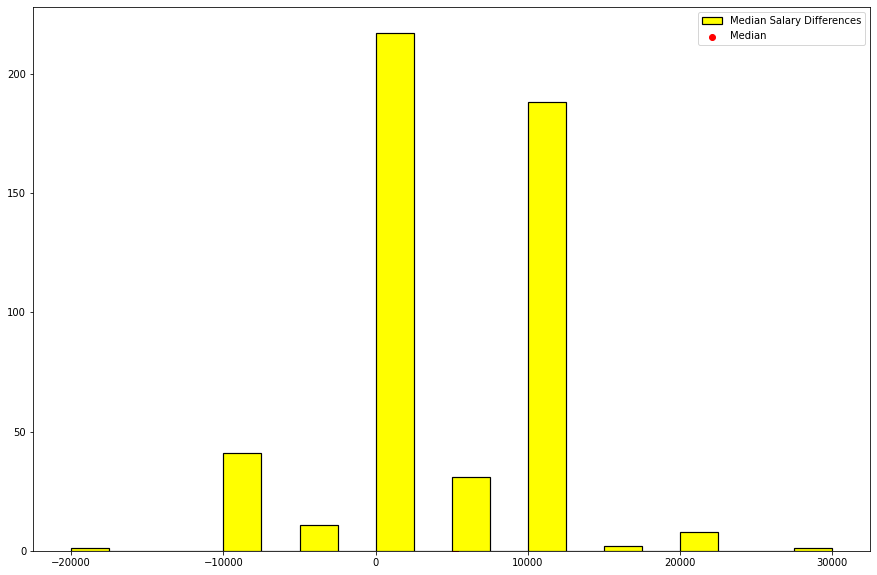

In [28]:

from matplotlib import pyplot
####DATA CLEANING IS ALREADY DONE ABOVE####

values = {'0-10,000': 5000, '10-20,000': 15000, '20-30,000': 25000, '30-40,000': 35000,'40-50,000': 45000, '50-60,000': 55000, '60-70,000': 65000, '70-80,000': 75000,'80-90,000': 85000, '90-100,000': 95000, '100-125,000': 112500,
       '125-150,000': 137500, '150-200,000': 175000, '200-250,000': 225000,
       '250-300,000': 275000, '300-400,000': 350000, '400-500,000': 450000,
       '500,000+':500000,'500,000':500000}
clean_data['salary'] = clean_data['Q9'].apply(lambda value: values[value]) # Average calculation for approximation Salaries

arrays = []
for i in range(500):
    
    mi=clean_data[clean_data['Q1']=='Male'].index 
    ms=np1.random.choice(mi,250,replace=False)
    fmale=clean_data.loc[ms]
    Male_data=fmale['salary'].median() # Median for male 
    fi=clean_data[clean_data['Q1']=='Female'].index
    fs=np1.random.choice(fi,250,replace=False)
    ffemale=clean_data.loc[fs]
    Female_data=ffemale['salary'].median() # Median for female
    arrays.append(Male_data-Female_data)
mf=clean_data.groupby('Q1')
mm=mf.get_group('Male')['salary'].median()
fm=mf.get_group('Female')['salary'].median()
Median_diff_Male_Female=male_median-female_median # Difference of the Median Male and Median Female Salary
histogram = pyplot.figure(figsize=(15,10))
pyplot.hist(arrays,bins=20,alpha=1.0,edgecolor='black',color='yellow', linewidth=1.2,label='Median Salary Differences') # PLot histogram for 500 samples of Median salries of Male and Female 
pyplot.scatter(Median_diff_Male_Female,0,color='red',label='Median') # Plot dot for Median differnce of male and female
pyplot.legend()
print(f"The Median Salary differences of Males and females is {Median_diff_Male_Female}")

**Q6) HISTOGRAM OF THE MEAN OF THE BOOTSTRAP VALUES**

The Mean of original data is between 2618.931802116014 and 9986.049629575185


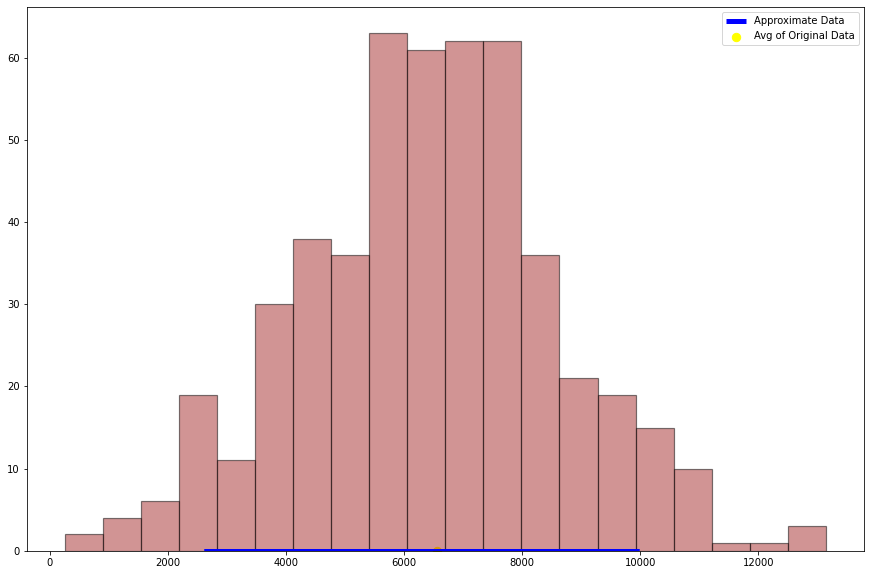

In [30]:
arrays = []
sample_data=clean_data.sample(5000,replace=False) #To Generate 5000 resamples randomly from Dataset without replacement
sample_data=sample_data[['Q1','salary']]
for temp in range(500):
    bootstrap_sample=sample_data.sample(5000,replace=True) # Random samples of 5000 with replacment
    bootstrap_sample_groupby=bootstrap_sample.groupby('Q1')
    bootrap_male_mean=bootstrap_sample_groupby.get_group('Male')['salary'].mean() #Average Male Salary
    bootrap_female_mean=bootstrap_sample_groupby.get_group('Female')['salary'].mean() #Average Female Salary
    arrays.append(bootrap_male_mean-bootrap_female_mean)# Subtracting Male and Female Average Salary
samples=pd1.DataFrame(arrays,columns=['Bootstrap_values']) #  Random Bootstrap Samples from array to samples
firstextreme=samples.Bootstrap_values.quantile(0.050) # 5 % data in normal distribution
lastextreme=samples.Bootstrap_values.quantile(0.950) #95 % of data in normal distribution
print(f"The Mean of original data is between {firstextreme} and {lastextreme}")

male_avg=mf.get_group('Male')['salary'].mean() # Male average of original population
female_avg=mf.get_group('Female')['salary'].mean() #Female average of original population
Avg_diff_Male_Female=male_avg-female_avg # Difference of Male average and Female average
histogram = pyplot.figure(figsize=(15,10))
pyplot.hist(arrays,bins=20,alpha=0.5,color='brown',edgecolor='black', linewidth=1.2) # Histogram for Bootstarp samples
pyplot.hlines((0,0),firstextreme,lastextreme, colors='blue', linestyles='solid',linewidth=5,label='Approximate Data') # Line that shows the approxiamte data around the mean
pyplot.scatter(Avg_diff_Male_Female,0,color='yellow',s=70,label='Avg of Original Data') #To plot Dot of original mean
pyplot.legend()

**Q7)  A-B Testing to find P-value** 

P value is 0.4134134134134134


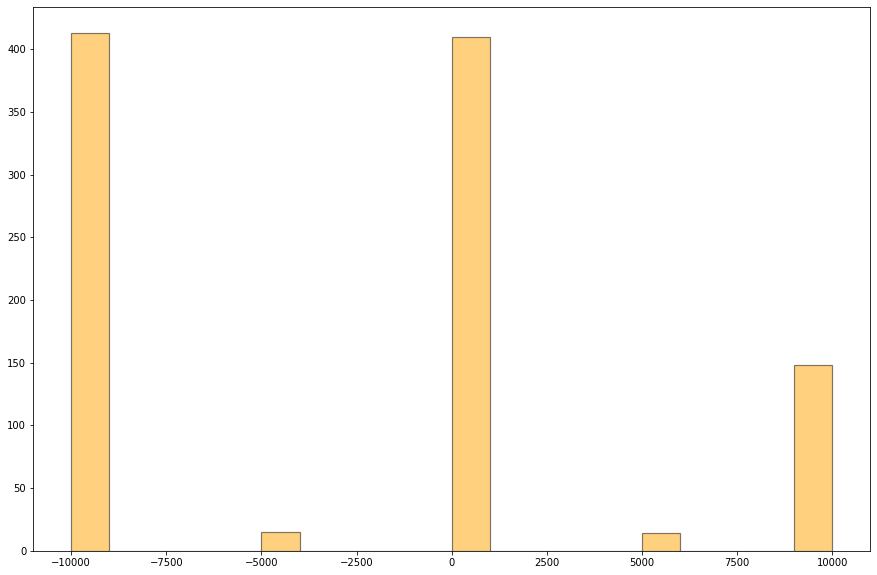

In [25]:
i_md = []
p1=clean_data[['Q1','salary']]
for i in range(1000):
  i_d=p1.sample(len(p1),replace=False)['Q1'].reset_index()['Q1']
  data={'Q1data':i_d}
  now = pd1.DataFrame(data)
  a1=p1['Q1'].reset_index()['Q1']
  a2=p1['salary'].reset_index()['salary']
  now['salary']=a2
  now['now_gender']=a1
  i_g=now.groupby('Q1data')
  i_m=i_g.get_group('Male')['salary'].median() #Male Median value for shuffles data
  i_f=i_g.get_group('Female')['salary'].median()
  i_md.append(i_m-i_f) #Difference of Male and Female resampled median
mf=clean_data.groupby('Q1')
mm=mf.get_group('Male')['salary'].median() #Male median of original data
fm=mf.get_group('Female')['salary'].mean() 
mfmd=mm-fm #Difference of male median and female median
histogram = pyplot.figure(figsize=(15,10))
pyplot.hist(i_md,bins=20,alpha=0.5,color='orange',edgecolor='black', linewidth=1.2)
i_md=np1.array(i_md)
P1=np1.count_nonzero( i_md <= mfmd ) / i #Storing P value
print(f"P value is {P1}")

